# Introduction 

PT Higo Fitur Indonesia adalah salah satu penyedia layanan WiFi advertising terkemuka di Indonesia. Dengan solusi inovatif berbasis teknologi WiFi dan analisis data, Higo membantu bisnis menjangkau audiens tersegmentasi secara efektif di era digital. Saat ini, Higo telah menjangkau 136 kawasan strategis di berbagai kota besar di Indonesia, mencakup lokasi dengan tingkat kunjungan yang tinggi. Perusahaan ini juga berhasil mencapai lebih dari 80 juta impresi bulanan dan memiliki 70% pengguna WiFi aktif bulanan.

Melalui layanan di kawasan-kawasan ini, Higo menawarkan sinergi yang saling menguntungkan: konsumen mendapatkan akses WiFi gratis selama durasi tertentu dengan memberikan data pribadi mereka, sementara Higo memanfaatkan data tersebut untuk mendukung operasional perusahaan dan memberikan nilai tambah kepada klien.

Sebagai pemimpin di bidang solusi digital, Higo dihadapkan pada tantangan untuk terus memahami pola perilaku pengguna WiFi. Informasi seperti waktu login, lokasi hotspot favorit, dan preferensi digital pengguna menjadi faktor kunci dalam mengoptimalkan layanan serta meningkatkan keterlibatan audiens. Analisis ini bertujuan untuk mengeksplorasi pola tersebut, menyediakan wawasan yang relevan, serta memberikan rekomendasi berbasis data guna meningkatkan efektivitas kampanye WiFi advertising dan mendorong pertumbuhan bisnis klien Higo.

# Identifikasi Masalah 

Sebagai data scientist di PT Higo Fitur Indonesia, saya ditugaskan untuk menganalisis pola perilaku pengguna WiFi perusahaan. Saat ini, perusahaan ingin memahami pola penggunaan WiFi yang relevan untuk memberikan wawasan mendalam tentang perilaku pengguna. Dengan analisis ini, diharapkan perusahaan dapat:

1. Mengidentifikasi pola-pola terbaru yang mungkin relevan untuk pengembangan layanan.
2. Memahami kondisi terkini pengguna untuk mengantisipasi kebutuhan mereka.
3. Menemukan insights tersembunyi dalam data yang bisa dimanfaatkan untuk meningkatkan keuntungan, baik secara finansial maupun operasional.

Hasil analisis ini akan membantu perusahaan dalam melakukan improvement berbasis data untuk jangka panjang, baik untuk meningkatkan pengalaman pengguna, mengoptimalkan strategi pemasaran, maupun mendukung pengambilan keputusan strategis lainnya.



# Import Libraries 

In [49]:
# Import libraries yang akan dibutuhkan
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import ttest_ind

Library telah berhasil diimport 

# Data Loading


In [50]:
# Import dataset yang akan dipakai
df = pd.read_csv('dataset_real.csv')
#cek
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Location Type,Location,Nama,Email,Handphone,Login Hour,Year Birth,Digital Interest,Address
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Restaurant,Liberte Italian Cuisine,"Silvia Maryadi, S.T.",silviamaryadis.t.1@gmail.com,89964112669,14,1984,e-commerce,"Jalan Kutisari Selatan No. 332, Tangerang, 46881"
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,Cafe,The Post Coffee and Eatery,"Makara Januar, S.Psi",makarajanuars.psi2@aol.com,81351231714,9,1977,news,"Gg. Kendalsari No. 3, Tangerang, 63272"
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Cafe,Kedai Sinau,R. Aisyah Zulkarnain,r.aisyahzulkarnain3@yahoo.com,85945889174,1,1982,streaming video,"Jl. Waringin No. 60, Jakarta Timur, 80635"
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,Restaurant,Ramen Ya! Gandaria City,Citra Jailani,citrajailani4@aol.com,81985564279,4,2004,news,"Jalan Rungkut Industri No. 05, Tangerang Selat..."
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,Compound Space,Menara FIF - Kantin 2,Galuh Kusmawati,galuhkusmawati5@yahoo.com,82334298375,6,1993,news,"Jl. Asia Afrika No. 761, Jakarta Selatan, 12490"


Terlihat disini bagaimana bentukan dataset, namun jika kita melihat sekilas dataset ini kurang enak untuk dibaca. Seharusnya atau biasanya dataset itu diawali nama ID kemudian user terlebih dahulu dan email dan kemudian baru kebutuhan-kebutuhan teknis mengenai teks. Oleh karena itu saya akan coba rapikan urutan kolom supaya lebih enak dibaca. 

In [51]:
# cek columns order 
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'Location Type', 'Location', 'Nama', 'Email', 'Handphone', 'Login Hour',
       'Year Birth', 'Digital Interest', 'Address'],
      dtype='object')

In [52]:
# Urutan kolom yang sudah diatur
sorted_order = ['User ID', 'Nama', 'Email', 'Handphone', 'Gender', 'Age', 'Year Birth', 
                'Address', 'Location', 'Location Type', 'Device Model', 'Operating System',
                'App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 
                'Login Hour', 'Digital Interest', 'User Behavior Class']

# Mengatur ulang kolom DataFrame
df = df[sorted_order]

# Menampilkan DataFrame setelah pengaturan ulang
df.head(1)


,User ID,Nama,Email,Handphone,Gender,Age,Year Birth,Address,Location,Location Type,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Login Hour,Digital Interest,User Behavior Class
0,1,"Silvia Maryadi, S.T.",silviamaryadis.t.1@gmail.com,89964112669,Male,40,1984,"Jalan Kutisari Selatan No. 332, Tangerang, 46881",Liberte Italian Cuisine,Restaurant,Google Pixel 5,Android,393,6.4,1872,67,1122,14,e-commerce,4


Data sudah berurutan sesuai dengan identifikasi user di awal, kemudian bagian mengenai lokasi lokasi type, dan informasi teknis selanjutnya. Urutan ini diharapkan bisa memberikan konsistensi data. 

Selanjutnya kita akan memberikan artian artian dari setiap kolom untuk memudahkan pembaca dalam membaca kode serta kolom (fitur) pada dataframe ini. 



| **No** | **Kolom**                   | **Penjelasan**                                                                 |
|--------|-----------------------------|---------------------------------------------------------------------------------|
| 1      | User ID                     | ID unik untuk mengidentifikasi setiap pengguna.                                 |
| 2      | Nama                        | Nama lengkap pengguna.                                                         |
| 3      | Email                       | Alamat email pengguna.                                                         |
| 4      | Handphone                   | Nomor telepon pengguna.                                                        |
| 5      | Gender                      | Jenis kelamin pengguna (Laki-laki/Perempuan).                                  |
| 6      | Age                         | Usia pengguna dalam tahun.                                                     |
| 7      | Year Birth                  | Tahun kelahiran pengguna.                                                      |
| 8      | Address                     | Alamat lengkap pengguna.                                                       |
| 9      | Location                    | Lokasi geografis wifi yang diakses.                                            |
| 10     | Location Type               | Tipe Lokasi Wifi yang digunakan oleh pengguna.                                 |
| 11     | Device Model                | Model perangkat yang digunakan pengguna.                                       |
| 12     | Operating System            | Sistem operasi perangkat pengguna (Android/iOS).                               |
| 13     | Wifi Usage Time (min/day)   | Waktu penggunaan wifi per hari (dalam menit).                                  |
| 14     | Screen On Time (hours/day)  | Total waktu layar aktif per hari (dalam jam).                                  |
| 15     | Battery Drain (mAh/day)     | Konsumsi baterai rata-rata per hari (dalam miliampere-jam).                    |
| 16     | Number of Apps Installed    | Jumlah aplikasi yang terinstal di perangkat pengguna.                          |
| 17     | Data Usage (MB/day)         | Penggunaan data rata-rata per hari (dalam megabyte).                           |
| 18     | Login Hour                  | Jam login pengguna ke wifi.                                                    |
| 19     | Digital Interest            | Minat digital pengguna, seperti e-commerce, gaming, atau media sosial.         |
| 20     | User Behavior Class         | Kategori perilaku pengguna berdasarkan aktivitas digital (misalnya, aktif/pasif). |

sebagai catatan karena data ini merupakan data dummy dan generated berdasarkan kode python sebelumnya maka disini perlu dilakukan perubahan minor untuk memastikan bahwa jenis data dan kolom sesuai dengan penjelasan dan kebutuhan analisis kita saat ini. 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Nama                        700 non-null    object 
 2   Email                       700 non-null    object 
 3   Handphone                   700 non-null    int64  
 4   Gender                      700 non-null    object 
 5   Age                         700 non-null    int64  
 6   Year Birth                  700 non-null    int64  
 7   Address                     700 non-null    object 
 8   Location                    700 non-null    object 
 9   Location Type               700 non-null    object 
 10  Device Model                700 non-null    object 
 11  Operating System            700 non-null    object 
 12  App Usage Time (min/day)    700 non-null    int64  
 13  Screen On Time (hours/day)  700 non

Disini terlihat data sudah bersih dan tidak ada null value meskipun kita harus cek ulang dalam section data cleaning untuk kepastian namun terlihat sekilas data sudah bersih. Masih terdapat kesalahan Dtype untuk beberapa fitur misalkan Handphone itu lebih baik menggunakan object. Age juga bisa menggunakan objek. Kita harus mengganti nama kolom seperti APP Usage Time untuk penyesuaian pada penjelasan dan dataset. 

In [54]:
# cek bentuk dari data 
df.shape

(700, 20)

Terdapat 700 baris dan 20 kolom pada dataset ini

# Data Cleaning 
Pada section ini akan dilakukan perubahan nama kolom , kemungkinan akan drop fitur -fitur yang redundan, cek missing value, cek duplicat. 

In [55]:
# cek missing value 
df.isna().sum()

User ID                       0
Nama                          0
Email                         0
Handphone                     0
Gender                        0
Age                           0
Year Birth                    0
Address                       0
Location                      0
Location Type                 0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Login Hour                    0
Digital Interest              0
User Behavior Class           0
dtype: int64

Terlihat disini tidak ada missing value pada dataset. 

In [56]:
# cek duplikat
df.duplicated().sum()

0

Pada dataset ini tidak terlihat adanya data duplikat dengan melihat angka 0 pada hasil cel result diatas

In [57]:
# cek nama kolom 
df.columns

Index(['User ID', 'Nama', 'Email', 'Handphone', 'Gender', 'Age', 'Year Birth',
       'Address', 'Location', 'Location Type', 'Device Model',
       'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Login Hour',
       'Digital Interest', 'User Behavior Class'],
      dtype='object')

In [58]:
# ganti nama App Usage Time menjadi Wife Usage Time 

df.rename(columns={"App Usage Time (min/day)": "Wifi Usage Time (min/day)"}, inplace=True)

df.columns

Index(['User ID', 'Nama', 'Email', 'Handphone', 'Gender', 'Age', 'Year Birth',
       'Address', 'Location', 'Location Type', 'Device Model',
       'Operating System', 'Wifi Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Login Hour',
       'Digital Interest', 'User Behavior Class'],
      dtype='object')

In [59]:
# cek total jumlah dalam 2 kolom 
print(df['Digital Interest'].nunique())
print(df['User Behavior Class'].nunique())

5
5


In [60]:
# Pilih dua kolom tertentu
subset_df = df[['Digital Interest', 'User Behavior Class']]

# Tampilkan DataFrame hasil subset
subset_df.head(20)

,Digital Interest,User Behavior Class
0,e-commerce,4
1,news,3
2,streaming video,2
3,news,3
4,news,3
5,streaming video,2
6,e-commerce,4
7,other,5
8,e-commerce,4
9,e-commerce,4


Terdapat pola yang sama seperti e-commerce selalu 4, news selalu 3. dan seterusnya. Maka User behavior class ini bisa kita hapus. 

In [61]:
df.drop(columns=['User Behavior Class', 'User ID'], inplace=True)


In [62]:
# merubah datatype handphone menjadi object atau str
df['Handphone']=df['Handphone'].astype(object)

# Analysis 

## Menampilkan Ulang Dataset Yang Telah Bersih

Ini bertujuan untuk mempermudah kita ketika kita tinggal recall bagaimana bentuk dataframe (kemudahan programmer saja)


In [63]:
df.head(20)

,Nama,Email,Handphone,Gender,Age,Year Birth,Address,Location,Location Type,Device Model,Operating System,Wifi Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Login Hour,Digital Interest
0,"Silvia Maryadi, S.T.",silviamaryadis.t.1@gmail.com,89964112669,Male,40,1984,"Jalan Kutisari Selatan No. 332, Tangerang, 46881",Liberte Italian Cuisine,Restaurant,Google Pixel 5,Android,393,6.4,1872,67,1122,14,e-commerce
1,"Makara Januar, S.Psi",makarajanuars.psi2@aol.com,81351231714,Female,47,1977,"Gg. Kendalsari No. 3, Tangerang, 63272",The Post Coffee and Eatery,Cafe,OnePlus 9,Android,268,4.7,1331,42,944,9,news
2,R. Aisyah Zulkarnain,r.aisyahzulkarnain3@yahoo.com,85945889174,Male,42,1982,"Jl. Waringin No. 60, Jakarta Timur, 80635",Kedai Sinau,Cafe,Xiaomi Mi 11,Android,154,4.0,761,32,322,1,streaming video
3,Citra Jailani,citrajailani4@aol.com,81985564279,Male,20,2004,"Jalan Rungkut Industri No. 05, Tangerang Selat...",Ramen Ya! Gandaria City,Restaurant,Google Pixel 5,Android,239,4.8,1676,56,871,4,news
4,Galuh Kusmawati,galuhkusmawati5@yahoo.com,82334298375,Female,31,1993,"Jl. Asia Afrika No. 761, Jakarta Selatan, 12490",Menara FIF - Kantin 2,Compound Space,iPhone 12,iOS,187,4.3,1367,58,988,6,news
5,Dr. Laras Pranowo,dr.laraspranowo6@gmail.com,88884590258,Male,31,1993,"Jalan M.T Haryono No. 30, Jakarta Timur, 74862",Harton Tower,Office,Google Pixel 5,Android,99,2.0,940,35,564,22,streaming video
6,Galiono Utami,galionoutami7@gmail.com,89897525714,Female,21,2003,"Jalan Gegerkalong Hilir No. 9, Jakarta Timur, ...",Liberte Italian Cuisine,Restaurant,Samsung Galaxy S21,Android,350,7.3,1802,66,1054,9,e-commerce
7,"Gandewa Sitompul, S.Farm",gandewasitompuls.farm8@outlook.com,89722397081,Male,31,1993,"Jalan Jend. Sudirman No. 23, Jakarta Selatan, ...",Satoru,Restaurant,OnePlus 9,Android,543,11.4,2956,82,1702,16,other
8,Lutfan Maryati,lutfanmaryati9@outlook.com,83830948830,Female,42,1982,"Gg. Antapani Lama No. 0, Jakarta Barat, 36656",Warung Tekko Artha Gading,Restaurant,Samsung Galaxy S21,Android,340,7.7,2138,75,1053,21,e-commerce
9,"drg. Halim Hutapea, S.Kom",drg.halimhutapeas.kom10@gmail.com,81426878172,Male,42,1982,"Gang Jayawijaya No. 205, Jakarta Utara, 73434",Warung Tekko Daan Mogot,Restaurant,iPhone 12,iOS,424,6.6,1957,75,1301,0,e-commerce


## Analysis Section 


### Central Tendency

In [64]:
# cek central tendency of data
df.describe()

,Age,Year Birth,Wifi Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Login Hour
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,38.482857,1985.517143,271.128571,5.272714,1525.158571,50.681429,929.742857,12.065714
std,12.012916,12.012916,177.199484,3.068584,819.136414,26.943324,640.451729,7.211001
min,18.000000,1965.000000,30.000000,1.000000,302.000000,10.000000,102.000000,0.000000
25%,28.000000,1975.000000,113.250000,2.500000,722.250000,26.000000,373.000000,6.000000
50%,38.000000,1986.000000,227.500000,4.900000,1502.500000,49.000000,823.500000,13.000000
75%,49.000000,1996.000000,434.250000,7.400000,2229.500000,74.000000,1341.000000,18.000000
max,59.000000,2006.000000,598.000000,12.000000,2993.000000,99.000000,2497.000000,24.000000


Terlihat di atas merupakan central tendency dari data. Terlihat data di atas rata2 usia merupakan 38 tahun dengan variasi 12. Rata-rata pemakaian wifi adalah 177 menit dengan pemakaian data 929 MB per hari. Data lain bisa kita lihat di atas untuk melihat kejelasan dari central tendency dari dataset ini. 

### Proporsi Type Lokasi

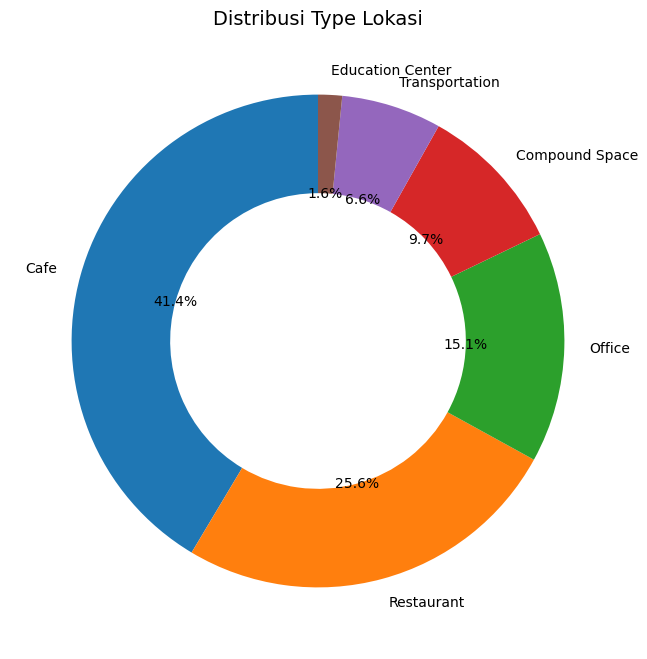

In [65]:
# Hitung jumlah masing-masing 'Location Type'
location_counts = df['Location Type'].value_counts()

# Buat pie chart (donut chart)
plt.figure(figsize=(8, 8))
plt.pie(location_counts.values, labels=location_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))  # width untuk membuat donut chart

# Tambahkan judul
plt.title('Distribusi Type Lokasi', fontsize=14)

# Tampilkan grafik
plt.show()

Grafik donut di atas menunjukkan bahwa sebagian besar pengguna yang login menggunakan Wi-Fi dari Higo mengaksesnya di cafe. Hal ini terlihat dari proporsi 41,4%, diikuti oleh restaurant dan office. Sementara itu, kategori Education Center berada di posisi kedua paling bawah.

Fenomena ini cukup rasional, mengingat orang cenderung lebih banyak menghabiskan waktu di cafe untuk bersosialisasi atau bekerja, sehingga mereka lebih sering login ke Wi-Fi gratis menggunakan perangkat mereka.

Setelah mengetahui bahwa mayoritas pengguna login di cafe, perusahaan dapat mempertimbangkan beberapa langkah strategis berikut:

1. Menambah jumlah tempat dengan Wi-Fi gratis di cafe dan restaurant, karena kedua kategori ini memiliki proporsi pengguna yang paling tinggi.
2. Mengurangi penambahan tempat Wi-Fi gratis di Education Center, karena proporsi pengguna di kategori ini relatif kecil.
3. Memastikan stabilitas Wi-Fi di cafe, mengingat tingginya tingkat penggunaan di lokasi tersebut.

### Distribusi Gender 

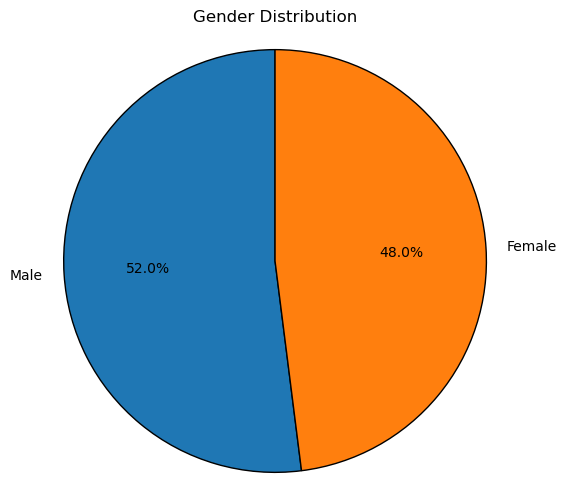

In [66]:
# menghitung proporsi gender
proporsi_gender = df['Gender'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(proporsi_gender, labels=proporsi_gender.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution')
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()

Grafik di atas menunjukkan bahwa distribusi gender pengguna Wi-Fi hampir seimbang, dengan proporsi 52% laki-laki dan 48% perempuan. Hal ini menunjukkan bahwa tidak ada ketimpangan signifikan dalam distribusi pengguna berdasarkan gender.

Dengan distribusi gender yang relatif merata, perusahaan dapat melanjutkan analisis lebih mendalam terkait perilaku atau preferensi berdasarkan gender tanpa khawatir akan adanya bias distribusi pengguna Wi-Fi.

### Histogram of Age

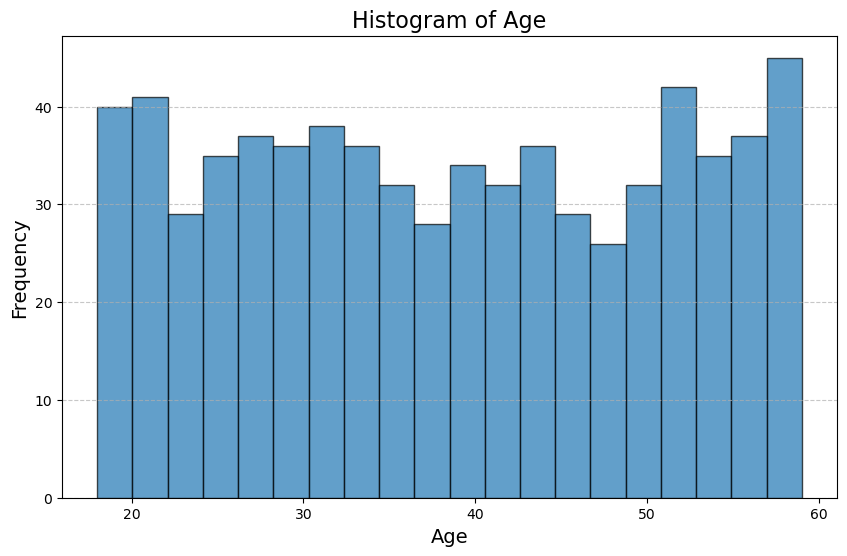

In [67]:
# Membuat histogram untuk kolom 'age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Histogram menunjukkan bahwa distribusi usia pengguna Wi-Fi relatif merata di berbagai rentang usia, mulai dari usia 20-an hingga 60-an. Tidak ada rentang usia yang mendominasi secara signifikan, meskipun ada sedikit fluktuasi dalam frekuensi.

In [68]:
# membuat kolom generasi 
def assign_generation(year_birth):
    if year_birth <= 1964:  # Baby Boomers (lahir <= 1964)
        return 'Baby Boomers'
    elif year_birth <= 1980:  # Gen X (lahir 1965-1980)
        return 'Gen X'
    elif year_birth <= 1996:  # Millennials (lahir 1981-1996)
        return 'Millennials'
    elif year_birth <= 2012:  # Gen Z (lahir 1997-2012)
        return 'Gen Z'
    else:  # Gen Alpha (lahir > 2012)
        return 'Gen Alpha'

# Assign generasi berdasarkan 'Year Birth'
df['generation'] = df['Year Birth'].apply(assign_generation)

# cek
df.head(1)

,Nama,Email,Handphone,Gender,Age,Year Birth,Address,Location,Location Type,Device Model,Operating System,Wifi Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Login Hour,Digital Interest,generation
0,"Silvia Maryadi, S.T.",silviamaryadis.t.1@gmail.com,89964112669,Male,40,1984,"Jalan Kutisari Selatan No. 332, Tangerang, 46881",Liberte Italian Cuisine,Restaurant,Google Pixel 5,Android,393,6.4,1872,67,1122,14,e-commerce,Millennials


Kolom generasi yang terdapat dalam dataset memberikan nilai tambah dalam pembacaan pola data. Dengan adanya informasi mengenai generasi, analisis dapat lebih terarah karena dalam satu generasi biasanya terdapat kesamaan dalam minat, kebiasaan, dan hobi. Hal ini memungkinkan perusahaan untuk menawarkan pengalaman atau layanan yang sesuai dengan preferensi khas setiap generasi.

Dengan memahami karakteristik tiap generasi, perusahaan dapat:

1. Mengembangkan strategi yang lebih personal dan relevan untuk meningkatkan pengalaman pengguna.
2. Menyesuaikan layanan atau fitur yang lebih cocok dengan kebiasaan dan kebutuhan generasi tertentu.
3. Meningkatkan efisiensi dalam penyediaan layanan dengan mengelompokkan audiens berdasarkan pola generasi mereka.

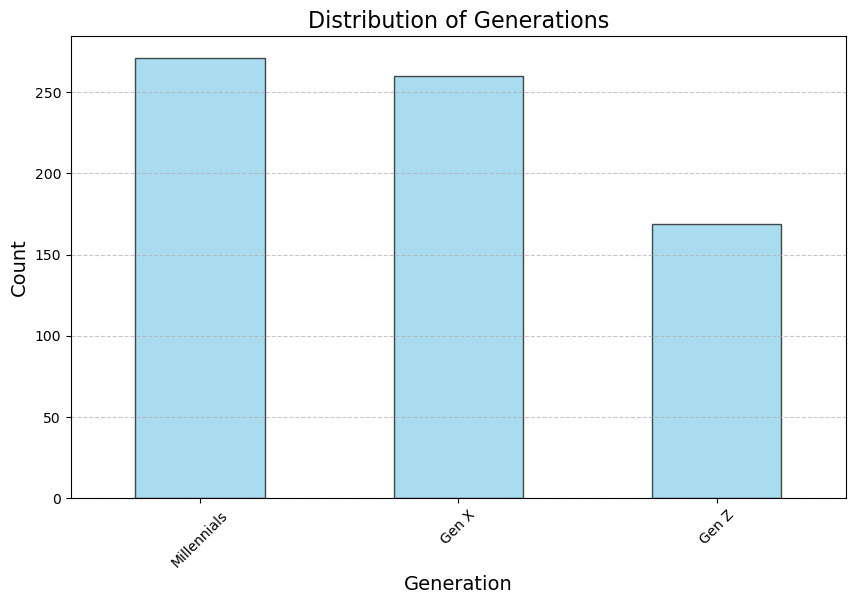

In [69]:

# Plot persebaran generasi
plt.figure(figsize=(10, 6))
df['generation'].value_counts(sort=False).plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Distribution of Generations', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Dari grafik di atas, terlihat bahwa Generasi Milenial dan Generasi X mendominasi total populasi dalam dataset. Karena mayoritas pengguna berasal dari kedua generasi ini, perusahaan dapat mengalihkan fokus layanan untuk lebih mengakomodasi kebutuhan dan preferensi mereka.

Beberapa strategi yang dapat dilakukan adalah:

1. Menyesuaikan Iklan dan Promosi. Perusahaan dapat membuat iklan yang relevan dengan kesamaan karakteristik Generasi Milenial dan Gen X.
Misalnya, untuk pengguna laki-laki, bisa menjalin kemitraan dengan perusahaan rokok, karena kemungkinan besar banyak dari mereka yang sudah dewasa dan memiliki kebiasaan tersebut.
Untuk pengguna perempuan, promosi bisa diarahkan ke sektor fashion wanita, produk anak-anak, atau paket liburan keluarga.
Pendalaman 

2. Perusahaan perlu menggali lebih dalam preferensi spesifik dari masing-masing generasi untuk memberikan pengalaman layanan yang lebih personal.
Contoh: Generasi Milenial mungkin lebih menyukai layanan berbasis teknologi dan efisiensi, sementara Generasi X cenderung menghargai keandalan dan kenyamanan.
Dengan fokus pada kebutuhan utama kedua generasi ini, perusahaan dapat meningkatkan relevansi dan daya tarik layanan, sekaligus memaksimalkan potensi bisnis.

In [70]:
# Menghitung jumlah value untuk setiap lokasi
df['Location'].value_counts().head(5)



Location
Warung Tekko Artha Gading    23
Gedung Cyber                 23
JEC Kedoya                   20
Menara FIF - Kantin 2        19
Menara Satu                  19
Name: count, dtype: int64

Dari data di atas, terlihat bahwa lokasi login favorit pelanggan memiliki angka yang cukup kecil jika dibandingkan dengan total populasi. Sebagai contoh, lokasi teratas, Warung Tekko Artha Gading, hanya mencatat 23 login dari 700 total data, yang berarti kontribusinya kurang dari 5% terhadap keseluruhan populasi. Dengan angka kontribusi yang rendah, lokasi-lokasi ini tidak memberikan dominasi signifikan dalam pola login pelanggan. Oleh karena itu, lokasi-lokasi ini mungkin kurang relevan untuk dijadikan fokus utama analisis atau strategi perusahaan.

In [71]:
# # Mengelompokkan data berdasarkan 'generation' dan menghitung jumlah untuk setiap 'Location Type'
grouped_data = df.groupby('generation')['Location Type']
grouped_data.value_counts()

generation   Location Type   
Gen X        Cafe                105
             Restaurant           65
             Office               37
             Compound Space       27
             Transportation       23
             Education Center      3
Gen Z        Cafe                 68
             Restaurant           44
             Office               26
             Compound Space       21
             Transportation        8
             Education Center      2
Millennials  Cafe                117
             Restaurant           70
             Office               43
             Compound Space       20
             Transportation       15
             Education Center      6
Name: count, dtype: int64

Cafe dan restoran merupakan dua lokasi dengan jumlah pengunjung yang signifikan dalam dataset, terutama dari generasi Millennials dan Gen X. Namun, sebelum merancang strategi pemasaran yang seragam untuk kedua lokasi ini, perlu dipastikan apakah rata-rata usia pelanggan di cafe dan restoran benar-benar sama.

Jika rata-rata usia pelanggan di kedua lokasi ini tidak berbeda signifikan, maka perusahaan dapat menerapkan strategi yang serupa. Sebaliknya, jika terdapat perbedaan yang signifikan, maka diperlukan pendekatan yang berbeda untuk setiap lokasi guna mengakomodasi preferensi demografi yang spesifik.

Pembahasan lebih lanjut mengenai analisis ini akan dilakukan di section A/B Testing di bawah.

### Operation System dan Brand HP

In [72]:
#  # Membuat kolom baru dengan merek HP
df['Brand'] = df['Device Model'].str.split().str[0]

# Melihat hasil beberapa baris pertama
print(df[['Device Model', 'Brand']].head())

     Device Model    Brand
0  Google Pixel 5   Google
1       OnePlus 9  OnePlus
2    Xiaomi Mi 11   Xiaomi
3  Google Pixel 5   Google
4       iPhone 12   iPhone


In [73]:
# Total Jumlah HP 
df['Brand'].value_counts()

Brand
Xiaomi     146
iPhone     146
Google     142
OnePlus    133
Samsung    133
Name: count, dtype: int64

Dari data di atas, terlihat bahwa tidak ada brand HP yang secara signifikan mendominasi pasar, karena jumlah pengguna untuk setiap brand relatif merata. Oleh karena itu, tidak ada kebutuhan untuk memberikan highlight atau fokus yang berlebihan pada strategi pemasaran berbasis brand.

Namun, karena sebagian besar brand di atas menggunakan sistem operasi Android, strategi pemasaran dapat diarahkan pada pengembangan UI/UX untuk platform Android. Hal ini memungkinkan perusahaan untuk menciptakan pengalaman pengguna yang lebih baik dan lebih relevan bagi mayoritas pelanggan. Bukti terkait dominasi Android akan dibahas lebih lanjut di bagian berikut.

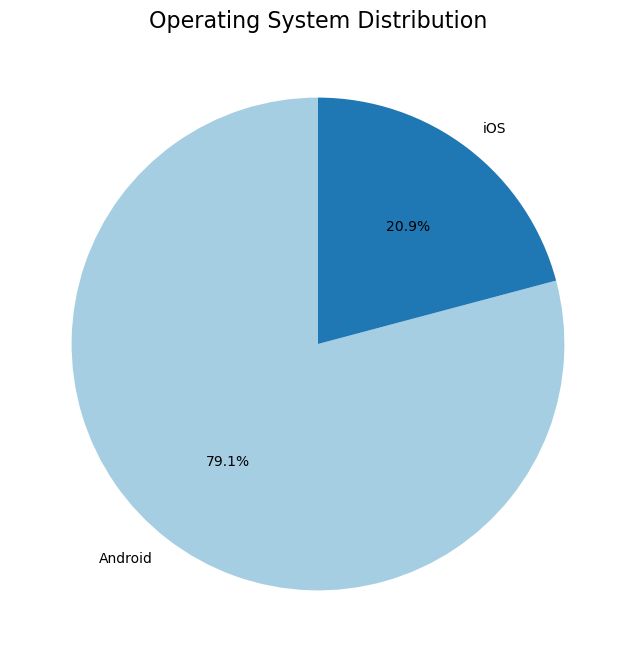

In [74]:
# Menghitung jumlah setiap OS
os_counts = df['Operating System'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
os_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Operating System Distribution', fontsize=16)
plt.ylabel('')  # Menghilangkan label y untuk tampilan lebih bersih
plt.show()


Dari grafik distribusi sistem operasi, terlihat bahwa mayoritas pengguna menggunakan perangkat berbasis **Android** (79,1%), sementara pengguna **iOS** hanya mencakup 20,9%. Dengan distribusi yang dominan ini, perusahaan Higo dapat mempertimbangkan langkah-langkah berikut:

1. **Fokus pada Pengembangan UX untuk Android**:
   - Mengingat sebagian besar pengguna menggunakan Android, penting bagi Higo untuk memberikan perhatian lebih pada **pengalaman pengguna (UX)** di platform ini.
   - Pastikan aplikasi berjalan lancar di berbagai perangkat Android dengan optimasi yang sesuai untuk berbagai resolusi dan spesifikasi.

2. **Pertimbangan Strategi untuk Pengguna iOS**:
   - Meskipun jumlah pengguna iOS lebih kecil, mereka cenderung memiliki daya beli lebih tinggi. Untuk memaksimalkan potensi ini, Higo dapat mempertimbangkan:
     - Menawarkan **fitur premium** yang dirancang khusus untuk pengguna iOS.
     - Melacak variabel target tambahan seperti **konversi dari klik iklan**, **pembelian fitur premium**, atau **durasi penggunaan aplikasi** untuk melihat apakah pengguna iOS memberikan nilai lebih besar dalam hal profitabilitas.

3. **Strategi Jangka Panjang**:
   - Tambahkan data tambahan, seperti **pendapatan per pengguna (ARPU)**, untuk memahami apakah pengguna iOS memberikan kontribusi lebih besar dibandingkan Android dalam hal pemasukan.
   - Gunakan hasil analisis ini untuk memutuskan apakah pengembangan fitur khusus untuk iOS lebih menguntungkan dalam jangka panjang.

---

 **Kesimpulan**
Dengan distribusi perangkat yang didominasi oleh Android, Higo harus memprioritaskan optimasi dan pengembangan UX pada platform Android. Namun, pengguna iOS tetap penting untuk diperhatikan, terutama jika mereka cenderung menghasilkan pendapatan lebih tinggi. Dengan menambahkan variabel target seperti konversi iklan atau pembelian fitur premium, Higo dapat memaksimalkan nilai dari kedua kelompok pengguna.


### Login Hour 

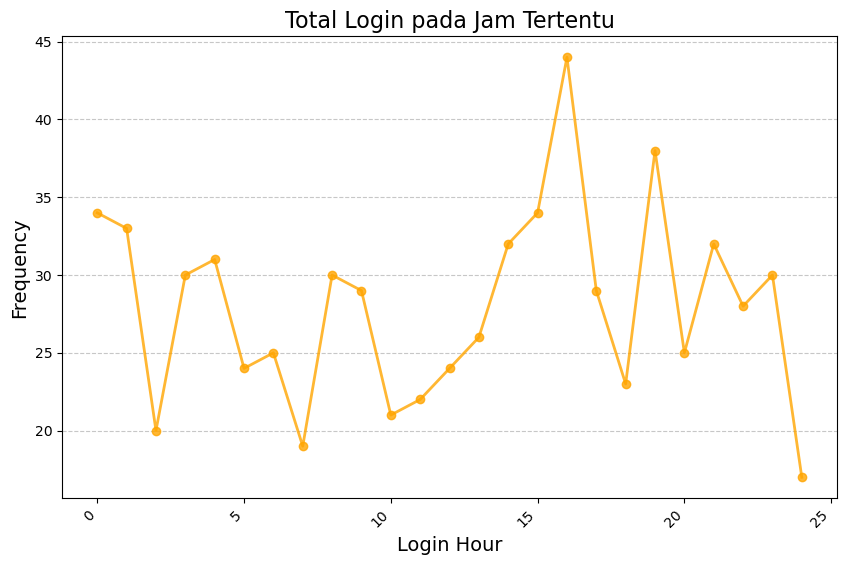

In [75]:
# Menghitung jumlah kemunculan setiap jam login
login_hour_counts = df['Login Hour'].value_counts()

# Menampilkan Top 10 Login Hours
login_hours = login_hour_counts.sort_index()

# Membuat line chart untuk Top 10 Login Hours
plt.figure(figsize=(10, 6))
plt.plot(login_hours.index, login_hours.values, marker='o', color='orange', linestyle='-', linewidth=2, alpha=0.8)
plt.title('Total Login pada Jam Tertentu', fontsize=16)
plt.xlabel('Login Hour', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Berdasarkan grafik di atas, terlihat bahwa pola login pengguna cukup fluktuatif sepanjang hari, dengan puncak login tertinggi terjadi pada pukul 16:00. Aktivitas login cenderung menurun drastis setelah pukul 20:00, dengan titik terendah pada pukul 23:00 dan dini hari. Lonjakan aktivitas login pada sore hari bisa jadi mencerminkan waktu luang pengguna setelah jam kerja atau aktivitas produktif, sementara penurunan pada malam hari mencerminkan waktu istirahat. Pola ini dapat dimanfaatkan oleh Higo untuk mengoptimalkan alokasi sumber daya jaringan pada jam-jam puncak seperti sore hari, serta menawarkan promosi khusus pada jam-jam yang lebih sepi untuk meningkatkan engagement pengguna.

In [76]:
# Definisikan fungsi untuk mengkategorikan Login Hour
def categorize_login_hour(hour):
    if 5 <= hour <= 10:
        return 'Pagi'  # Aktivitas pagi, seperti berangkat kerja/sekolah
    elif 11 <= hour <= 14:
        return 'Siang'  # Aktivitas siang, seperti makan siang atau istirahat
    elif 15 <= hour <= 18:
        return 'Sore'  # Aktivitas sore, seperti pulang kerja
    elif 19 <= hour <= 23:
        return 'Malam'  # Aktivitas malam, seperti hiburan atau makan malam
    else:
        return 'Dini Hari'  # Aktivitas dini hari, seperti lembur atau tidur

# Pastikan 'Login Hour' adalah integer
df['Login Hour'] = df['Login Hour'].astype(int)

# Membuat kolom baru untuk kategori aktivitas
df['Activity'] = df['Login Hour'].apply(categorize_login_hour)

# cek
print(df[['Login Hour', 'Activity']].head())


   Login Hour   Activity
0          14      Siang
1           9       Pagi
2           1  Dini Hari
3           4  Dini Hari
4           6       Pagi


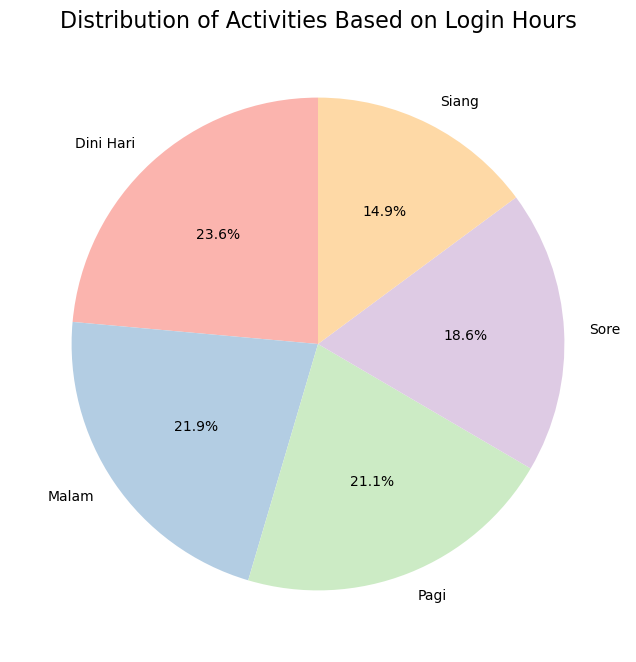

In [77]:
# Menghitung jumlah setiap kategori aktivitas
activity_counts = df['Activity'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
activity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Activities Based on Login Hours', fontsize=16)
plt.ylabel('')  # Menghilangkan label y untuk tampilan lebih bersih
plt.show()

Berdasarkan grafik di atas, terlihat bahwa lebih dari **40% pengguna melakukan login pada malam dan dini hari**. Hal ini mencerminkan kebiasaan pengguna yang mungkin dipengaruhi oleh **kondisi sosial dan gaya hidup masyarakat Jakarta**.

---

**Kemungkinan Penyebab Pola Login Malam dan Dini Hari**
1. **Budaya Nongkrong Malam di Jakarta**:
   - Masyarakat Jakarta dikenal dengan budaya **nongkrong malam**, baik di cafe, restoran, atau tempat lainnya. Hal ini didukung oleh keberadaan banyak lokasi yang buka hingga larut malam, seperti warung kopi, convenience store 24 jam, dan tempat hiburan malam.
   - Lokasi-lokasi ini sering menyediakan Wi-Fi gratis, yang membuat pengguna lebih cenderung login pada malam hari. Fakta ini didukung oleh data bahwa **Location Type** yang dominan adalah **cafe dan restoran**, yang menjadi tempat utama para pengguna untuk login.

2. **Pola Aktivitas Setelah Jam Kerja**:
   - Setelah jam kerja, banyak orang di Jakarta mencari waktu untuk bersantai, baik untuk makan malam, bertemu teman, atau sekadar melepas penat setelah seharian bekerja.
   - **Kemacetan Jakarta** yang sering terjadi pada sore hingga malam membuat orang lebih cenderung beraktivitas atau nongkrong di luar rumah setelah jam-jam macet usai.

3. **Pengaruh Work-Life Balance yang Fleksibel**:
   - Dengan semakin populernya pekerjaan berbasis teknologi dan kerja fleksibel (remote work), beberapa individu mungkin bekerja atau tetap aktif hingga larut malam.
   - Pola ini memungkinkan pengguna tetap terhubung ke internet untuk bekerja, menghibur diri, atau menyelesaikan tugas lainnya di luar jam kerja tradisional.

4. **Preferensi untuk Hiburan di Malam Hari**:
   - Malam dan dini hari sering menjadi waktu favorit untuk aktivitas hiburan seperti **streaming film**, **gaming**, atau menjelajahi media sosial. Hal ini mendorong lonjakan login selama jam-jam tersebut.

---

**Implikasi bagi Higo**
Melihat pola ini, Higo dapat mempertimbangkan langkah-langkah strategis berikut:
1. **Optimasi Layanan di Malam dan Dini Hari**:
   - Pastikan jaringan Wi-Fi yang stabil dan kapasitas server memadai untuk mendukung lonjakan pengguna pada malam dan dini hari.
   - Tawarkan **promosi spesial malam hari**, seperti diskon untuk layanan premium atau fitur eksklusif bagi pengguna yang login pada jam-jam tersebut.

2. **Kolaborasi dengan Tempat Nongkrong Malam**:
   - Jalin kerja sama dengan lokasi-lokasi populer yang buka hingga larut malam, seperti cafe 24 jam atau tempat hiburan malam, untuk memperluas penggunaan layanan Wi-Fi Higo.

3. **Penyesuaian Fitur Berdasarkan Waktu Login**:
   - Kembangkan fitur yang relevan untuk pengguna malam, seperti rekomendasi hiburan, konten eksklusif, atau paket layanan malam.

4. **Fokus pada Segmentasi Pengguna Malam**:
   - Gunakan data tambahan untuk memahami lebih dalam kebutuhan dan preferensi pengguna malam, misalnya kelompok usia, lokasi favorit, atau jenis perangkat yang digunakan.

---

**Kesimpulan**
Polarisasi login pada malam dan dini hari di Jakarta mencerminkan gaya hidup masyarakat yang dipengaruhi oleh budaya nongkrong, pola kerja yang fleksibel, dan kebutuhan hiburan. Dengan memahami pola ini, Higo dapat menyesuaikan strategi layanan untuk mengoptimalkan pengalaman pengguna pada waktu-waktu tersebut, sekaligus meningkatkan engagement dan potensi pendapatan.

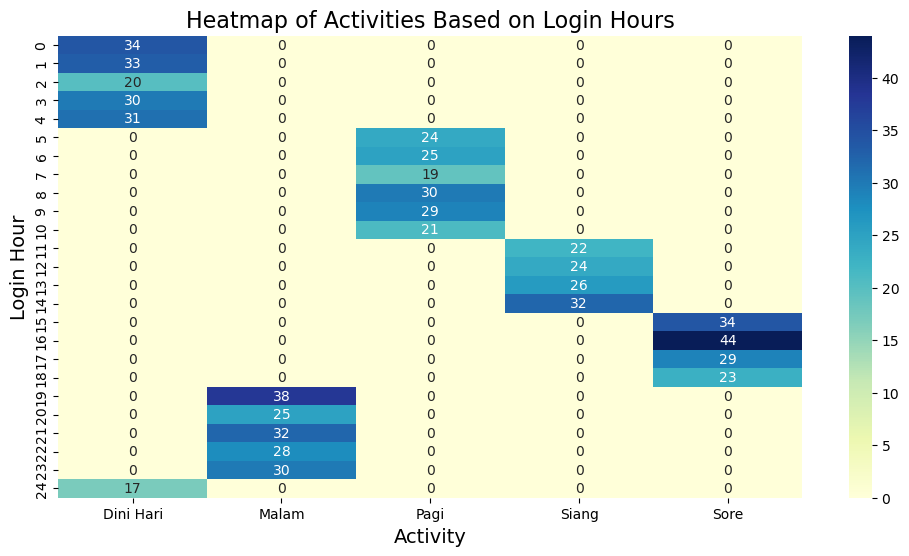

In [78]:
# Membuat tabel pivot untuk aktivitas dan login hour
pivot_table = pd.crosstab(df['Login Hour'], df['Activity'])

# Membuat heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Activities Based on Login Hours', fontsize=16)
plt.xlabel('Activity', fontsize=14)
plt.ylabel('Login Hour', fontsize=14)
plt.show()

Berdasarkan heatmap di atas, terlihat bahwa aktivitas login pada waktu **dini hari** memiliki distribusi yang terlihat cukup signifikan. Namun, setelah dianalisis lebih dalam, lonjakan aktivitas login pada dini hari sebenarnya **tidak terlalu tinggi jika dibandingkan dengan waktu lainnya**, seperti malam hari atau sore hari.

---

 **Kesimpulan untuk Dini Hari**
- **Penyebab Tampilan Dominasi**:
  - Aktivitas pada dini hari terlihat mencolok karena pembagian waktu yang dilakukan pada kategori ini mencakup beberapa jam.
  - Secara absolut, login pada dini hari tidak menunjukkan lonjakan signifikan jika dibandingkan dengan waktu login pada malam atau sore hari.

- **Implikasi untuk Higo**:
  - Tidak diperlukan penambahan kapasitas server secara khusus untuk waktu dini hari, karena lonjakan pengguna yang nyata lebih terjadi pada **malam hari**.
  - Fokus optimalisasi server dapat tetap diarahkan pada waktu **malam** dan **sore**, di mana jumlah login lebih terkonsentrasi secara signifikan.

---

 **Rekomendasi Strategis**
1. **Prioritaskan Malam Hari**:
   - Mengalokasikan sumber daya untuk waktu malam hari akan lebih efisien, karena waktu ini menunjukkan konsentrasi login tertinggi.
   - Pastikan stabilitas jaringan dan layanan yang optimal pada malam hari untuk mendukung pengalaman pengguna.

2. **Tinjau Pola Login Dini Hari secara Terpisah**:
   - Meskipun tidak perlu fokus pada server dini hari, Higo tetap dapat memanfaatkan waktu ini untuk promosi khusus seperti diskon malam larut atau fitur hiburan untuk pengguna aktif pada waktu tersebut.

---

 **Kesimpulan Utama**
Distribusi login yang terlihat tinggi pada dini hari lebih merupakan hasil dari pembagian waktu dalam analisis, bukan lonjakan aktivitas yang sebenarnya. Oleh karena itu, perusahaan dapat lebih memfokuskan pengelolaan sumber daya pada waktu dengan aktivitas login yang lebih intens, seperti malam dan sore hari.
"""

### Waktu Aktivitas dan Lokasi 

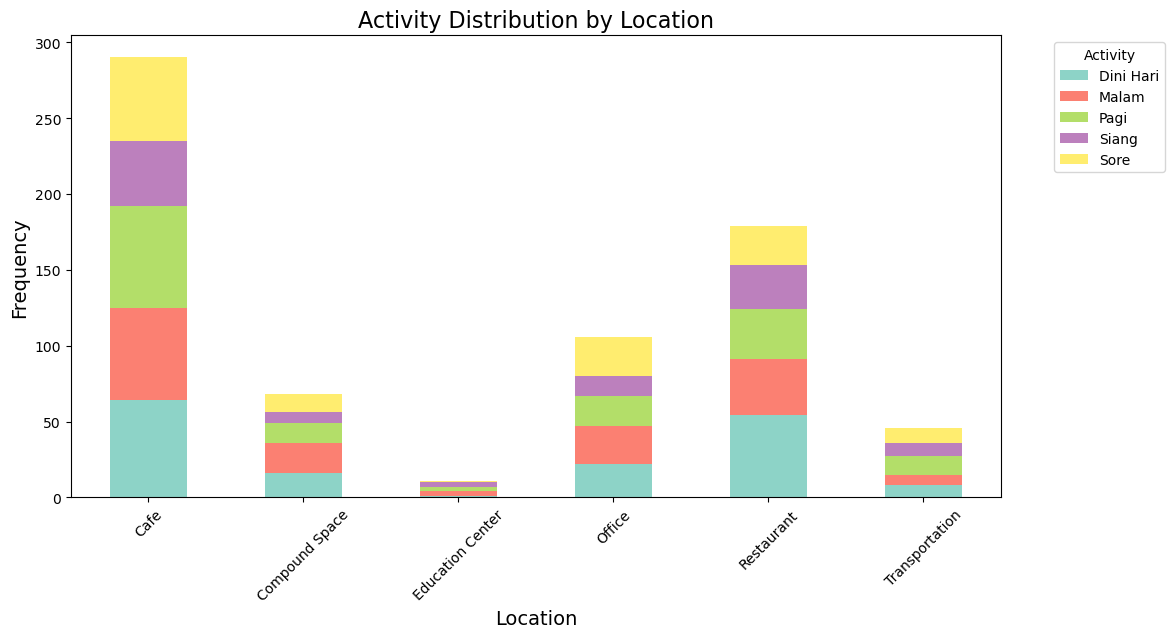

In [79]:
# Buat graph untuk stack bar
grouped_data = df.groupby(['Location Type', 'Activity']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Set3')
plt.title('Activity Distribution by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


Grafik di atas menunjukkan distribusi aktivitas login berdasarkan lokasi dan waktu. Terlihat bahwa di cafe dan restoran, aktivitas login berlangsung secara merata selama 24 jam, tanpa adanya kecenderungan waktu tertentu yang benar-benar sepi.



In [80]:
# cek total jummlah di digital interest dari customer
df['Digital Interest'].value_counts()

Digital Interest
streaming video    146
news               143
e-commerce         139
other              136
sosmed             136
Name: count, dtype: int64

Dari hasil distribusi digital interest pelanggan, terlihat bahwa pola ketertarikan pengguna cukup merata. Tidak ada kategori yang secara signifikan mendominasi, menunjukkan bahwa minat digital pelanggan tersebar di berbagai aktivitas online.

In [81]:
grouped_data = df.groupby('generation')['Digital Interest']
grouped_data.value_counts()


generation   Digital Interest
Gen X        e-commerce          59
             streaming video     54
             news                53
             other               50
             sosmed              44
Gen Z        e-commerce          38
             news                38
             streaming video     33
             other               32
             sosmed              28
Millennials  sosmed              64
             streaming video     59
             other               54
             news                52
             e-commerce          42
Name: count, dtype: int64

Dari tabel distribusi Digital Interest berdasarkan generasi, terlihat bahwa tidak ada perbedaan signifikan di antara kelompok Gen X, Gen Z, dan Millennials. Setiap generasi menunjukkan preferensi yang cukup merata terhadap berbagai kategori digital interest. 

### Data Usage Section

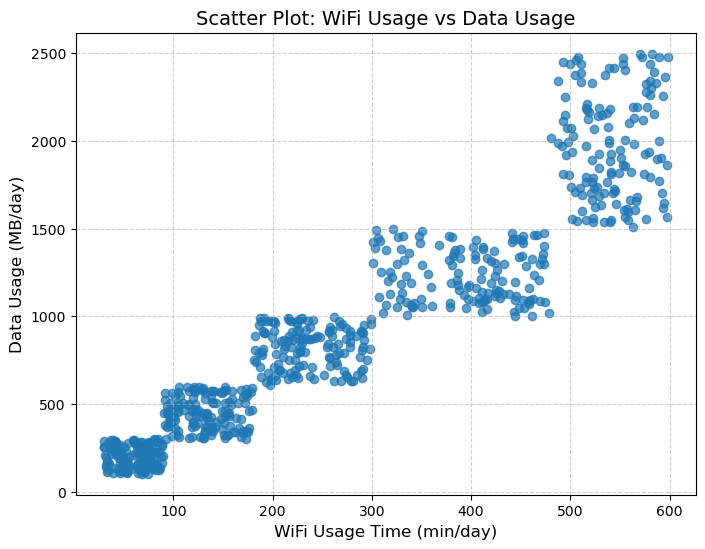

In [82]:
# Membuat scatter plot wifi usage dan data usage
plt.figure(figsize=(8, 6))
plt.scatter(df['Wifi Usage Time (min/day)'], df['Data Usage (MB/day)'], alpha=0.7)
plt.title('Scatter Plot: WiFi Usage vs Data Usage', fontsize=14)
plt.xlabel('WiFi Usage Time (min/day)', fontsize=12)
plt.ylabel('Data Usage (MB/day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

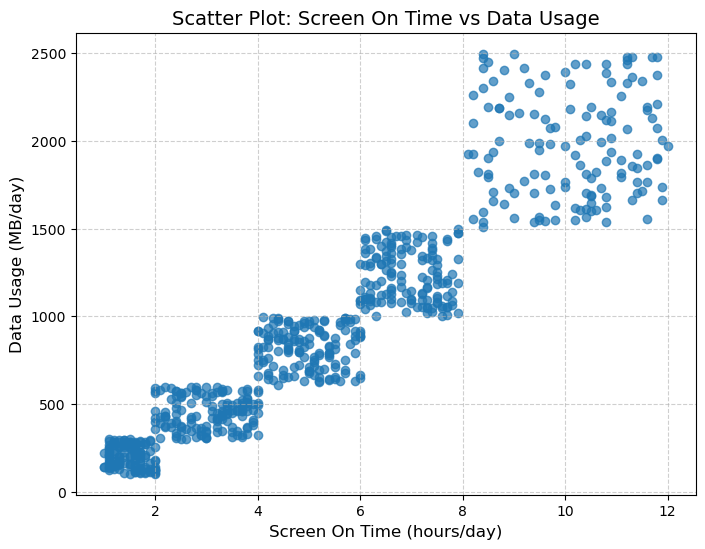

In [83]:
# Membuat scatter plot antara Screen On Time dan Data Usage
plt.figure(figsize=(8, 6))
plt.scatter(df['Screen On Time (hours/day)'], df['Data Usage (MB/day)'], alpha=0.7)
plt.title('Scatter Plot: Screen On Time vs Data Usage', fontsize=14)
plt.xlabel('Screen On Time (hours/day)', fontsize=12)
plt.ylabel('Data Usage (MB/day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

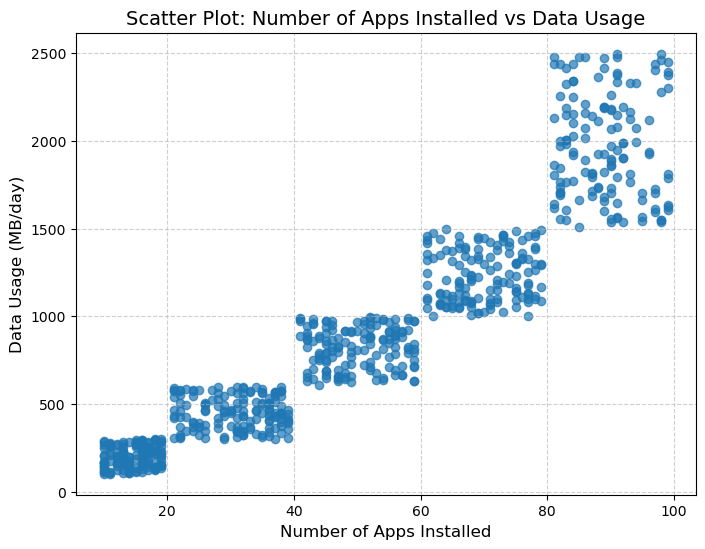

In [84]:
# Membuat scatter plot antara Number of Apps Installed dan Data Usage
plt.figure(figsize=(8, 6))
plt.scatter(df['Number of Apps Installed'], df['Data Usage (MB/day)'], alpha=0.7)
plt.title('Scatter Plot: Number of Apps Installed vs Data Usage', fontsize=14)
plt.xlabel('Number of Apps Installed', fontsize=12)
plt.ylabel('Data Usage (MB/day)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Dari tiga scatter plot di atas, terlihat bahwa semakin tinggi jumlah aplikasi yang diinstal, screen on time, dan waktu penggunaan Wi-Fi, semakin tinggi pula data usage yang digunakan oleh pengguna. Hal ini menunjukkan bahwa aktivitas digital yang intensif secara langsung berdampak pada konsumsi data.

Higo dapat memanfaatkan informasi ini dengan menyediakan layanan khusus untuk pengguna Wi-Fi berat. Misalnya, memastikan jaringan tetap stabil untuk mendukung aktivitas seperti streaming, gaming, atau belanja online yang memerlukan data besar.

Selain itu, dengan menggunakan machine learning, Higo dapat mendeteksi pengguna berat secara real-time. Strategi seperti menampilkan iklan lebih sering atau memberikan penawaran khusus kepada pengguna ini dapat membantu meningkatkan engagement dan potensi pendapatan.

In [85]:
# Memisahkan email provider (bagian setelah @)
df['Email Provider'] = df['Email'].str.split('@').str[1]

# Melihat hasil beberapa baris pertama
print(df[['Email', 'Email Provider']].head())


                           Email Email Provider
0   silviamaryadis.t.1@gmail.com      gmail.com
1     makarajanuars.psi2@aol.com        aol.com
2  r.aisyahzulkarnain3@yahoo.com      yahoo.com
3          citrajailani4@aol.com        aol.com
4      galuhkusmawati5@yahoo.com      yahoo.com


Pembuatan kolom Email Provider bertujuan untuk mempermudah pembacaan pola berdasarkan penyedia layanan email. Dengan mengetahui penyedia email seperti Gmail, Yahoo, atau AOL, Higo dapat menganalisis tren penggunaan email provider tertentu dalam dataset. Hal ini juga membuka peluang untuk melakukan personalisasi layanan, seperti mengoptimalkan strategi pemasaran berdasarkan preferensi pengguna dari provider yang dominan. Sebagai contoh, pengguna Gmail mungkin lebih cocok menerima promosi melalui aplikasi Google, sementara pengguna Yahoo atau AOL bisa dijangkau dengan metode yang lebih spesifik sesuai ekosistem mereka. Pendekatan ini memungkinkan perusahaan meningkatkan efektivitas komunikasi dan engagement dengan pelanggan.

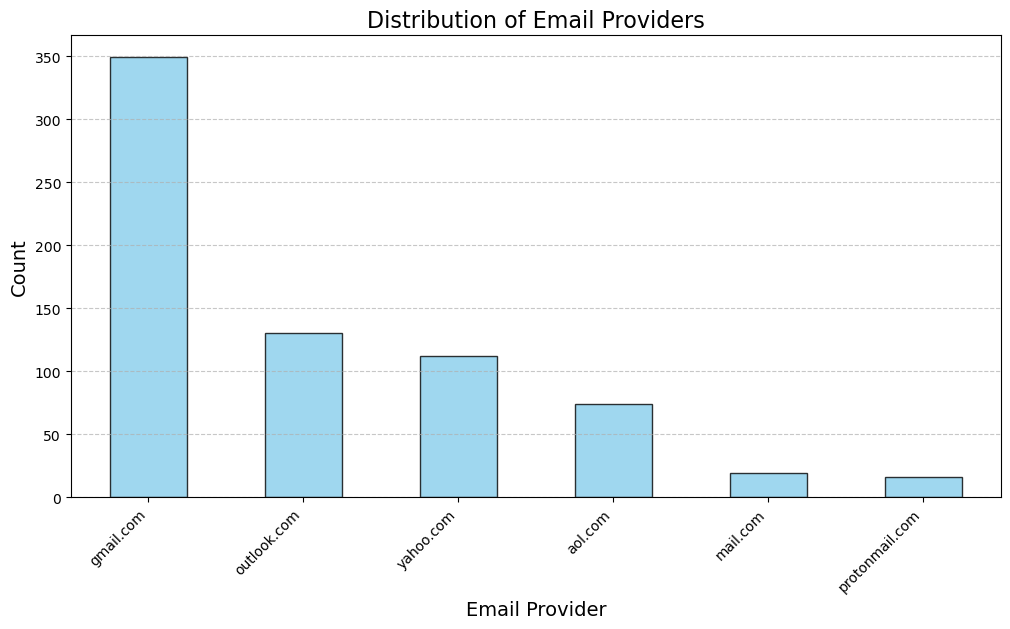

In [86]:
# Menghitung jumlah setiap email provider
email_provider_counts = df['Email Provider'].value_counts()

# Membuat bar plot
plt.figure(figsize=(12, 6))
email_provider_counts.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.8)
plt.title('Distribution of Email Providers', fontsize=16)
plt.xlabel('Email Provider', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan distribusi Email Provider, terlihat bahwa mayoritas pengguna menggunakan gmail.com sebagai penyedia layanan email, dengan jumlah yang jauh lebih besar dibandingkan dengan provider lainnya seperti outlook.com, yahoo.com, dan aol.com. Hal ini menunjukkan dominasi Gmail sebagai platform utama yang digunakan oleh pelanggan Higo, mencerminkan preferensi masyarakat terhadap ekosistem Google yang umum ditemukan pada perangkat berbasis Android.

Jika digabungkan dengan fakta bahwa Android merupakan sistem operasi paling dominan di kalangan pengguna Higo, fokus utama layanan harus diarahkan pada optimalisasi pengalaman pengguna (UI/UX) untuk platform Android. Sebagian besar pengguna Android terintegrasi dengan Gmail secara langsung, sehingga pengalaman pengguna dapat lebih dioptimalkan melalui integrasi seamless antara aplikasi Higo dan ekosistem Google, seperti notifikasi email otomatis atau penggunaan Google Play untuk layanan premium.

Strategi Higo juga dapat mencakup promosi khusus yang dirancang untuk pengguna Gmail dan Android, seperti personalisasi iklan yang relevan di dalam aplikasi. Misalnya, iklan untuk layanan premium dapat ditargetkan kepada pengguna Android yang sering menggunakan Gmail, mengingat kemudahan aksesibilitas di dalam platform ekosistem ini. Selain itu, kampanye email marketing dapat difokuskan pada pengguna Gmail untuk meningkatkan engagement, mengingat Gmail mendominasi basis pelanggan Higo.

Secara keseluruhan, Higo perlu mengalokasikan sumber daya untuk lebih mengutamakan pengembangan layanan yang ramah terhadap perangkat Android dan Gmail. Dengan fokus pada optimalisasi UI/UX untuk Android, serta integrasi fitur yang lebih mendalam dengan Gmail, Higo dapat memberikan pengalaman pengguna yang lebih baik sekaligus memaksimalkan engagement serta retensi pelanggan. Pendekatan berbasis data ini memungkinkan Higo memanfaatkan kekuatan ekosistem Android dan Gmail secara lebih efektif.

In [87]:
# Definisikan fungsi untuk mendeteksi provider nomor HP tanpa 0 di awal
def detect_provider(phone_number):
    # Pastikan phone_number berupa string dan hilangkan 0 di awal
    phone_number = str(phone_number)
    # Ekstrak 3 atau 4 digit pertama (tanpa 0 di awal)
    prefix = phone_number[:3]
    
    # Telkomsel
    if prefix in ['811', '812', '813', '821', '822', '823', '851', '852', '853']:
        return 'Telkomsel'
    # Indosat IM3
    elif prefix in ['814', '815', '816', '855', '856', '857', '858']:
        return 'Indosat IM3'
    # Tri
    elif prefix in ['895', '896', '897', '898', '899']:
        return 'Tri'
    # XL Axiata - XL
    elif prefix in ['817', '818', '819', '859', '877', '878']:
        return 'XL'
    # XL Axiata - AXIS
    elif prefix in ['831', '832', '833', '838']:
        return 'AXIS'
    # Smartfren
    elif prefix in ['881', '882', '883', '884', '885', '886', '887', '888', '889']:
        return 'Smartfren'
    # Tidak dikenal
    else:
        return 'Unknown'

# Membuat kolom baru untuk provider
df['Phone Provider'] = df['Handphone'].apply(detect_provider)

# Melihat hasil beberapa baris pertama
print(df[['Handphone', 'Phone Provider']].head())


     Handphone Phone Provider
0  89964112669            Tri
1  81351231714      Telkomsel
2  85945889174             XL
3  81985564279             XL
4  82334298375      Telkomsel


Pembuatan kolom baru untuk mempermudah pola baca. 

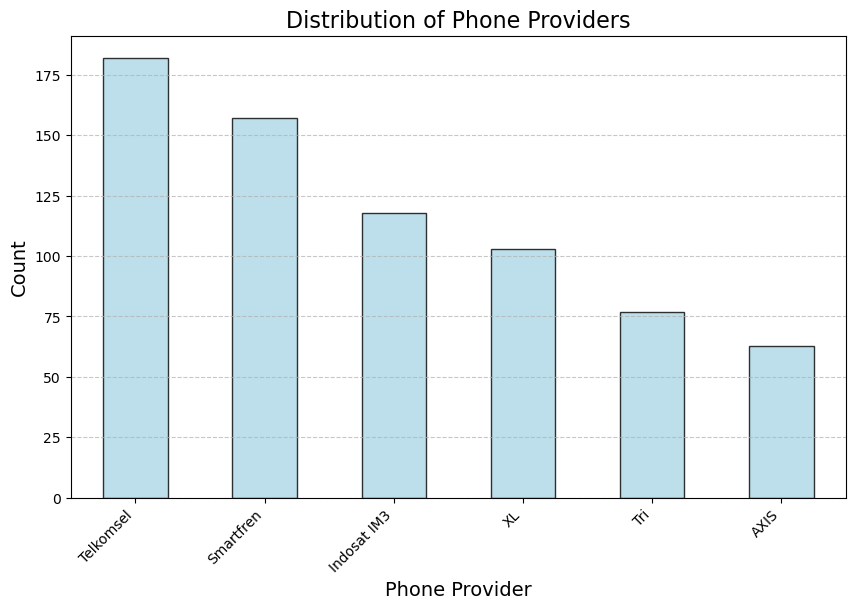

In [88]:
# Menghitung jumlah setiap provider
provider_counts = df['Phone Provider'].value_counts()

# Membuat barplot
plt.figure(figsize=(10, 6))
provider_counts.plot(kind='bar', color='lightblue', edgecolor='k', alpha=0.8)
plt.title('Distribution of Phone Providers', fontsize=16)
plt.xlabel('Phone Provider', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan grafik distribusi Phone Providers, terlihat bahwa Telkomsel dan Smartfren mendominasi jumlah pengguna, dengan Telkomsel memiliki pelanggan terbanyak. Dominasi ini menunjukkan bahwa mayoritas pengguna Higo berasal dari kedua provider ini, yang mencerminkan pangsa pasar besar yang mereka miliki di kalangan pelanggan Higo. Hal ini dapat menjadi peluang strategis untuk memanfaatkan dominasi tersebut dalam kerangka kerja sama yang saling menguntungkan.

Higo dapat mengajukan peluang kerja sama kepada Telkomsel dan Smartfren, terutama dalam bentuk penempatan iklan di platform Higo. Dengan data bahwa mayoritas pengguna adalah pelanggan mereka, Higo dapat menawarkan iklan yang sangat tersegmentasi, sehingga efektif menjangkau target pasar utama mereka. Selain itu, Higo bisa memanfaatkan data penggunaan untuk menyusun strategi iklan berbasis lokasi atau waktu, memberikan nilai lebih bagi Telkomsel dan Smartfren dalam menjangkau pelanggan mereka di momen yang tepat. Kerja sama ini berpotensi memberikan keuntungan besar bagi kedua belah pihak, baik dalam bentuk pendapatan tambahan untuk Higo maupun promosi yang lebih efektif untuk Telkomsel dan Smartfren.

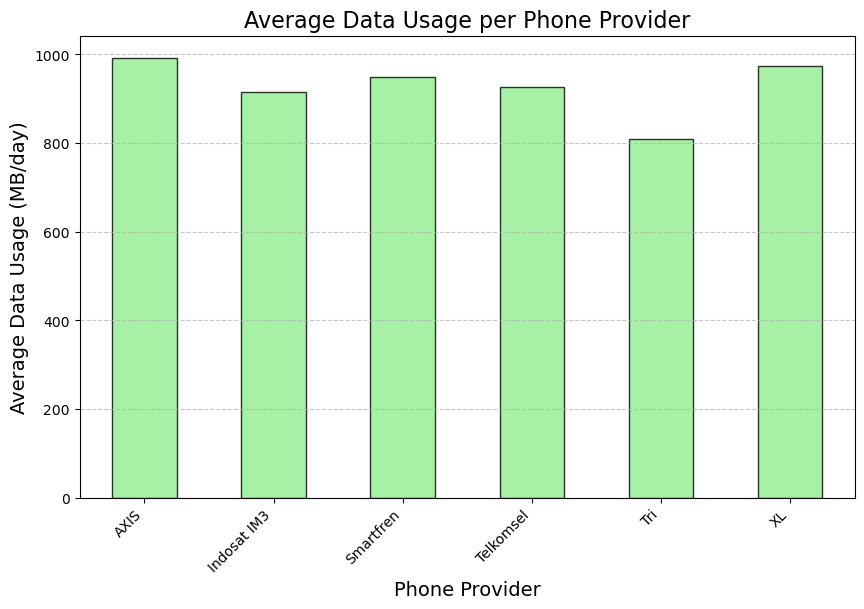

In [89]:
# Menghitung rata-rata penggunaan data untuk setiap provider
average_data_usage = df.groupby('Phone Provider')['Data Usage (MB/day)'].mean()

# Membuat barplot
plt.figure(figsize=(10, 6))
average_data_usage.plot(kind='bar', color='lightgreen', edgecolor='k', alpha=0.8)
plt.title('Average Data Usage per Phone Provider', fontsize=16)
plt.xlabel('Phone Provider', fontsize=14)
plt.ylabel('Average Data Usage (MB/day)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Tidak ada pola khusus apakah pengguna provider tertentu menggunakan data usage yang lebih banyak. 

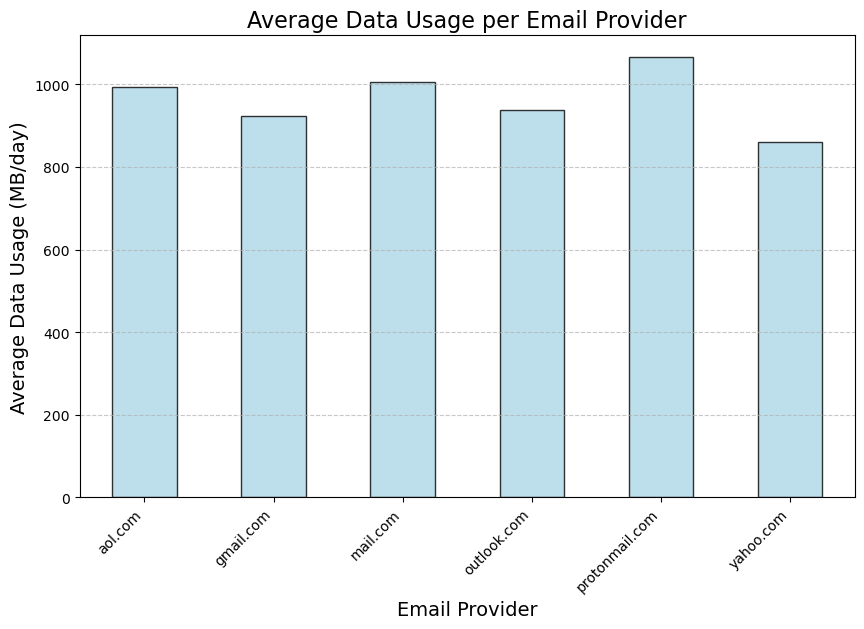

In [90]:
# Menghitung rata-rata penggunaan data untuk setiap email provider
average_data_usage_email = df.groupby('Email Provider')['Data Usage (MB/day)'].mean()

# Membuat barplot
plt.figure(figsize=(10, 6))
average_data_usage_email.plot(kind='bar', color='lightblue', edgecolor='k', alpha=0.8)
plt.title('Average Data Usage per Email Provider', fontsize=16)
plt.xlabel('Email Provider', fontsize=14)
plt.ylabel('Average Data Usage (MB/day)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pada email provider juga tidak terdapat pola-pola khusus

In [91]:
# Fungsi untuk mengecek pendidikan tinggi berdasarkan keberadaan titik
def check_higher_education(name):
    # Pastikan 'name' berupa string
    name = str(name)
    # Cek apakah terdapat titik
    if '.' in name:
        return 'Ya'
    else:
        return 'Tidak'

# Menerapkan fungsi ke kolom 'Name' dan membuat kolom baru
df['Higher Education'] = df['Nama'].apply(check_higher_education)

# Melihat hasil beberapa baris pertama
print(df[['Nama', 'Higher Education']].head())


                   Nama Higher Education
0  Silvia Maryadi, S.T.               Ya
1  Makara Januar, S.Psi               Ya
2  R. Aisyah Zulkarnain               Ya
3         Citra Jailani            Tidak
4       Galuh Kusmawati            Tidak


Saya beranggapan orang orang dengan gelar R. atau raden itu memiliki ilmu lebih tinggi, karena mereka keturunan keraton atau kerajaan. Maka saya akan mengklasifikasikan disini pola-pola unik apakah ada orang yang lebih menghabiskan pemakaian data antara orang berpendidikan tinggi atau tidak. 

Pola penamaan bisa terlihat jika terdapat titik maka ada gelar maka bisa kita anggap pendidikan lebih tinggi dibandingkan orang tanpa gelar. 

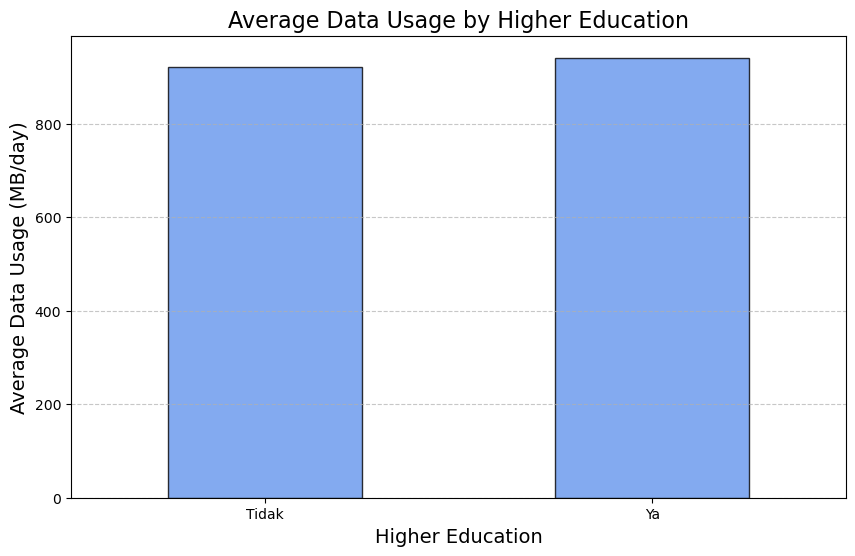

In [92]:
# Menghitung rata-rata penggunaan data untuk setiap kategori pendidikan
average_data_usage_education = df.groupby('Higher Education')['Data Usage (MB/day)'].mean()

# Membuat barplot
plt.figure(figsize=(10, 6))
average_data_usage_education.plot(kind='bar', color='cornflowerblue', edgecolor='k', alpha=0.8)
plt.title('Average Data Usage by Higher Education', fontsize=16)
plt.xlabel('Higher Education', fontsize=14)
plt.ylabel('Average Data Usage (MB/day)', fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Setelah membuat kolom baru kita cek pada penggunaan ternyata baik orang yang berpendidikan tinggi ataupun tidak, keduanya memiliki rata-rata penggunaan data yang sama per hari. 

## Confidence Interval System 

Kami mengetahui bahwa rata-rata usia pelanggan kami adalah 38 tahun. Namun, untuk memahami profil pelanggan secara lebih mendalam, kami ingin menguji secara statistik berapa rentang usia 95% dari populasi pelanggan kami. Informasi ini akan menjadi dasar bagi kami dalam merancang strategi yang lebih efektif dan terarah untuk meningkatkan keterlibatan pelanggan di masa mendatang.

In [93]:
# cek dulu skewness normal atau tidak
skewness = df['Age'].skew()
print(skewness)

0.027974303216233527


In [94]:
# Mengukur Confidence Interval System

# Menghitung standar deviasi kolom 'Age'
std = df['Age'].std()

# Menghitung jumlah data (N)
N = len(df)

# Menghitung Confidence Interval (95%) untuk rata-rata kolom 'Age'
low, up = stats.norm.interval(
    0.95,  # Tingkat kepercayaan 95%
    loc=df['Age'].mean(),  # Rata-rata kolom 'Age'
    scale=std / np.sqrt(N)  # Standard Error = std / sqrt(N)
)

# Menampilkan hasil Confidence Interval
print('Lower Limit:', low)
print('Upper Limit:', up)


Lower Limit: 37.592944229355346
Upper Limit: 39.37277005635894


Hasil perhitungan di atas menunjukkan bahwa rata-rata usia pelanggan berada di rentang 37,59 hingga 39,37 tahun dengan tingkat kepercayaan 95%. Artinya, jika kita mengambil banyak sampel dari populasi yang sama, maka dalam 95% kasus, rata-rata usia populasi sebenarnya akan berada di dalam rentang ini.

## A/B Testing Generation 

Cafe dan restoran adalah dua lokasi utama dengan jumlah pengunjung yang signifikan dalam dataset ini, didominasi oleh generasi Millennials dan Gen X. Dalam konteks bisnis, penting bagi perusahaan untuk memahami profil pelanggan di masing-masing lokasi sebelum merancang strategi pemasaran. Salah satu langkah awal yang perlu dilakukan adalah memastikan apakah rata-rata usia pelanggan di kedua lokasi ini benar-benar sama atau berbeda secara signifikan. Hal ini penting karena, jika terdapat perbedaan yang signifikan, maka preferensi dan kebutuhan pelanggan di cafe dan restoran mungkin memerlukan pendekatan yang berbeda.

Untuk menjawab pertanyaan ini, dilakukan analisis menggunakan uji t-test independen untuk membandingkan rata-rata usia pelanggan di cafe dan restoran. Sebelum memulai analisis, perlu dirumuskan hipotesis nol (H₀) dan hipotesis alternatif (H₁):

 H0:μ Cafe = μ Restaurant.

 H1: μ Cafe != μ Restaurant
 

 Level signifikansi ditetapkan pada 7.5% (α = 0.075). Artinya, ada toleransi sebesar 7.5% untuk kesalahan dalam menyimpulkan ada perbedaan signifikan ketika sebenarnya tidak ada.
 kita menggunakan 7.5 % untuk memberikan kelonggaran dibandingkan konvensional itu 5%


Jika p-value < 0.075, maka tolak H₀ dan terima H₁. Ini berarti ada perbedaan signifikan dalam rata-rata usia antara pelanggan cafe dan restoran.

Jika p-value ≥ 0.075, maka gagal menolak H₀. Ini berarti tidak ada cukup bukti untuk menyimpulkan adanya perbedaan signifikan dalam rata-rata usia pelanggan di kedua lokasi.


In [95]:
# Filter data untuk pengunjung di 'Cafe' dan 'Restaurant'
cafe_ages = df[df['Location Type'] == 'Cafe']['Age']
restaurant_ages = df[df['Location Type'] == 'Restaurant']['Age']

# Lakukan uji t-test independen
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(cafe_ages, restaurant_ages)

# Print hasil
print(f"T-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Kesimpulan
if p_value < 0.075:  # Level signifikansi 7,5%
    print("Ada perbedaan signifikan dalam rata-rata usia antara pengunjung Cafe dan Restaurant.")
else:
    print("Tidak ada perbedaan signifikan dalam rata-rata usia antara pengunjung Cafe dan Restaurant.")

T-Statistic: 0.14445056541558116
P-Value: 0.885207006369203
Tidak ada perbedaan signifikan dalam rata-rata usia antara pengunjung Cafe dan Restaurant.


**Keputusan Statistik**
- Karena **p-value (0.885) ≥ 0.075**, tidak ada cukup bukti untuk menyimpulkan bahwa rata-rata usia pengunjung di **Cafe** berbeda secara signifikan dengan rata-rata usia pengunjung di **Restaurant**.
- Dengan demikian, hasil ini mendukung hipotesis nol (**H₀**) bahwa rata-rata usia pengunjung di kedua lokasi adalah **sama**.

---

**Implikasi Bisnis**
1. **Strategi Pemasaran yang Seragam**:
   - Tidak adanya perbedaan signifikan dalam rata-rata usia memungkinkan perusahaan untuk merancang strategi pemasaran yang seragam untuk pengunjung di **Cafe** dan **Restaurant**. Misalnya, promosi yang ditargetkan pada segmen demografi tertentu dapat berlaku untuk kedua lokasi tanpa memerlukan penyesuaian yang spesifik.

2. **Efisiensi Pengambilan Keputusan**:
   - Dengan hasil ini, perusahaan dapat menyederhanakan pendekatan pemasaran tanpa perlu membedakan strategi berdasarkan profil usia pelanggan di Cafe dan Restaurant. Hal ini akan menghemat waktu dan sumber daya.

3. **Fokus pada Faktor Lain**:
   - Meskipun usia tidak menunjukkan perbedaan signifikan, perusahaan dapat mengeksplorasi faktor lain seperti **waktu kunjungan**, **lokasi geografis**, atau **minat digital** pelanggan untuk memahami pola perilaku yang lebih spesifik di masing-masing lokasi.

---

**Kesimpulan**
Berdasarkan hasil uji t-test, rata-rata usia pengunjung di **Cafe** dan **Restaurant** tidak menunjukkan perbedaan yang signifikan. Oleh karena itu, perusahaan dapat memanfaatkan strategi pemasaran yang **seragam** untuk kedua lokasi. Dengan demikian, sumber daya dapat dialokasikan secara lebih efisien untuk meningkatkan kepuasan pelanggan di seluruh lokasi.


# Kesimpulan 


## Recap 

1. 60% dari user melakukan login pada cafe dan restaurant, proporsinya cafe 40% dan restaurant 60%. 
2. Tidak ada perbedaan mencolok antara user laki laki dan perempuan. 
3. Dari segi usia persebaran data cukup tersebar dengan rata di umur antara 18 sampai 59 an mungkin. 
4. Meskipun dari usia persebaran sama, namun dari generasi terlihat bahwa generasi dari milenial dan generasi X itu cukup mendominasi. 
5. Pada persebaran brand device tidak terlihat sangat signifikan, namun jika kita bedah lagi dengan operating system maka operating system android lebih dominan dibandingkan IOS. 
6. Titik tertinggi jam user login pada jam 4 dan 7 sore. Namun pada dinihari tidak menunjukkan penurunan yang signifikan. 
7. Aktifitas login di cafe dan restaurant tersebar merata secara 24 jam. 
8. Data perbandingan antara screen time, jumlah aplikasi, wifi usage berbanding lurus dengan pemakaian data dari internet wifi. 
9. Tidak ada perbedaan yang berarti pemakaian data untuk orang ( berpendidikan lebih tinggi, jenis provider, Email Provider, Internet Provider) dengan pemakaian data usage wifi gratis kita. 
10. Setelah melakukan test dengan confidence interval maka didapat range rata-rata usia yaitu 37,5 sampai 39,3 dengan confidenz interval 95%. 
11. Tidak ada perbedaan yang signifikan secara rata-rata usia untuk user pengunjung cafe dan restaurant.  

## Insight 

1. Menambah jumlah tempat dengan Wi-Fi gratis di cafe dan restaurant, karena kedua kategori ini memiliki proporsi pengguna yang paling tinggi.
2. Memastikan bahwa UX / UI , strategi pemasaran sesuai dengan generasi X atau generasi Y (milenial) terbukti bahwa generasi itu menunjukkan jumlah yang tinggi. 
3. Operation system android perlu diperhatikan lagi karena memiliki komponen yang besar, namun kita tidak boleh juga mengabaikan OS iOs karena itu merupakan user dengan preferensi harga lebih tinggi. Mungkin bisa dilakukan dengan analisa lagi mengenai tawaran-tawaran wifi premium tanpa iklan atau paket lainnya. 
4. Perlunya memastikan layanan kita secara 24 jam karena distribusi dari orang-orang login menunjukkan bahwa aktifitas login dalam 24 jam tidak ada penurunan aktifitas login yang signifikan. 
5. Penambahan partner untuk cafe dan restoran untuk memperluas layanan wifi advertising kita. Dengan demikian memungkinkan kita mendapatkan potensi tambahan pendapatan atau eksposure. 
6. Pembuatan sistem deteksi berbasis ML untuk screen time wifi usae dan jumlah aplikasi karena ini sangat berbanding lurus dengan pemakaian data. 
7. Perlunya dilakukan login secara berkala, karena ditakutkan orang yang login di wifi gratis itu login lama. Kemungkinan lain kita bisa menambah spot iklan untuk orang-orang yang login tersebut. 
8. Fokus kita untuk mempertambah jaringan dengan cafe cafe dan restaurant. Dikarenakan mayoritas user kita login di kedua tempat tersebut. 

# Data Saving 

In [96]:
# saving dataset for analysis
df.to_csv('dataset_after_analysis.csv',index=False)